In [1]:
from work.models.decoder import RecurrentNetwork

model = RecurrentNetwork(1, 1, stateful=True)
model.load_weights('../models/training/recurrent/recurrent_decoder_01_e100.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using Theano backend.


In [2]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)

In [3]:
video = None
for v in dataset.videos:
    if v.video_id == 'gwZleaX_ZR8':
        video = v
print(video.serialize())
video_path = '../downloads/dataset/validation/'+video.video_id+'.mp4'

{'duration': 149.61, 'annotations': [{'segment': [12.603327708618549, 31.04152935641235], 'label': 'Plataform diving'}, {'segment': [38.510167998556675, 49.01294108907213], 'label': 'Plataform diving'}, {'segment': [54.38102511311336, 71.65225197307213], 'label': 'Plataform diving'}, {'segment': [62.31645367039172, 64.4170082884948], 'label': 'Plataform diving'}, {'segment': [67.45114273686593, 71.65225197307213], 'label': 'Plataform diving'}, {'segment': [73.98620154874222, 77.48712591224738], 'label': 'Plataform diving'}, {'segment': [78.88749565764942, 84.02218472412365], 'label': 'Plataform diving'}, {'segment': [109.46223509892775, 121.36537793484527], 'label': 'Plataform diving'}, {'segment': [131.1679661526597, 136.30265521913392], 'label': 'Plataform diving'}, {'segment': [137.00284009183497, 142.3709241158762], 'label': 'Plataform diving'}], 'resolution': '854x480', 'subset': 'validation', 'num_frames': 4478, 'url': 'https://www.youtube.com/watch?v=gwZleaX_ZR8'}


In [4]:
import numpy as np
features = np.load('../downloads/features/gwZleaX_ZR8.npy')
print(features[:,:].shape)
nb_instances = features.shape[0]

features = features.reshape(nb_instances, 1, 4096)
print(features.shape)
model.reset_states()
YY=model.predict_classes(features, batch_size=1)


(279, 4096)
(279, 1, 4096)
279/279 [==============================] - 5s     


In [5]:
video.get_video_instances(16, 0)
ground_trouth = np.array([instance.output for instance in video.instances])
print(ground_trouth)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180   0   0   0   0   0   0   0   0   0   0 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180   0   0   0   0 180 180 180 180 180 180
 180   0   0   0 180 180 180 180 180 180 180 180 180   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 180 18

In [6]:
print(YY.shape)
YY=YY.reshape(nb_instances)
print(YY)
print(ground_trouth)


(279, 1)
[  0   0   7  14  14   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 180 180 180 180   0   0   0   0 180 180   0   0 180 180   0
   0   0   0 180 180   0   0   0 180 180 180 180   0   0   0   0   0   0
   0 180 180 180 180   0   0   0 180   0   0   0 180 180 180 180 180   0
   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180   0   0   0   0   0 180   0   0   0   0   0   0 180
 180 180   0   0   0 180 180 180 180 180   0 180 180 180 180   0   0   0
   0   0   0   0   0   0 180 180 180   0   0   0   0   0   0   0 180 180
 180 180 180 180   0   0 180 180 180 180 180   0 180 180 180 180 180   0
   0   0   0   0   0   0   0 180 180   0 180 180 180 180   0   0   0   0
   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180   0   0 180 180 180 180   0   0   0   0   0
   0   0   0 180   0 180   0   0   0 180 180   0 180 180 180 180 180 180
 180   0   0   0   0   0   0 180 180 180 1

In [7]:
dataset.get_output_index(video.label)

180

In [8]:
print(video.subset)

validation


In [9]:
print(ground_trouth==YY)

[ True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
  True False False False False  True  True False False  True  True False
 False False False  True  True False False False  True  True  True  True
 False False False False False False False  True  True  True False  True
  True  True False  True  True  True False False False False False  True
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
  True  True  True  True False  True False False False False False  True
  True  True False False False  True  True  True  True  True False  True
  True  True  True False False False False False False False False False
  True  True False  True  True  True False False False False  True  True
  True False False False False False  True  True  True  True  True False
  True False False False False  True  True  True  T

In [10]:
counts = np.bincount(YY)
print(counts)

[142   0   0   0   0   0   0   1   0   0   0   0   0   0   2   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 134]


In [11]:
predicted_class = np.argmax(np.bincount(YY)[1:])+1

In [12]:
print(predicted_class)

180


In [13]:
k_3 = np.argsort(counts[1:])[::-1][:] + 1
print(k_3)

(counts[k_3]/np.sum(counts[1:]))

[180  14   7  58  66  65  64  63  62  61  60  59  57  68  56  55  54  53
  52  51  50  49  48  67  69  46  80  88  87  86  85  84  83  82  81  79
  70  78  77  76  75  74  73  72  71  47  45 179  12  21  20  19  18  17
  16  15  13  11  23  10   9   8   6   5   4   3   2  22  24  44  35  43
  42  41  40  39  38  37  36  34  25  33  32  31  30  29  28  27  26  89
  90  91 136 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142
 141 140 139 138 157 158 159 170 178 177 176 175 174 173 172 171 169 160
 168 167 166 165 164 163 162 161 137 135  92 134 111 110 109 108 107 106
 105 104 103 102 101 100  99  98  97  96  95  94  93 112 113 114 125 133
 132 131 130 129 128 127 126 124 115 123 122 121 120 119 118 117 116   1]


array([ 0.97810219,  0.01459854,  0.00729927,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [15]:
from work.processing.data import get_top_k_predictions, get_top_k_predictions_score

top_3 = get_top_k_predictions(YY, 3)
print(top_3)
_, scores = get_top_k_predictions_score(YY, 3)
print(scores)
for index in top_3:
    print(scores, dataset.labels[index][1])

[180  14   7]
[ 0.97810219  0.01459854  0.00729927]
[ 0.97810219  0.01459854  0.00729927] Plataform diving
[ 0.97810219  0.01459854  0.00729927] Bullfighting
[ 0.97810219  0.01459854  0.00729927] Beach soccer


In [16]:
print(ground_trouth)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180   0   0   0   0   0   0   0   0   0   0 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180   0   0   0   0 180 180 180 180 180 180
 180   0   0   0 180 180 180 180 180 180 180 180 180   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 180 18

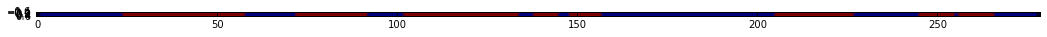

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

In [18]:
print(video.label)

Plataform diving


In [19]:
print(video.url)

https://www.youtube.com/watch?v=gwZleaX_ZR8


In [20]:
score = np.sum(YY==ground_trouth)/len(YY)

In [21]:
print(score)

0.480286738351


In [22]:
import random

videos = dataset.get_subset_videos('validation')
v = random.choice(videos)
print(v.video_id)

v-LmMLpvsbk


In [23]:
print(YY)

[  0   0   7  14  14   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 180 180 180 180   0   0   0   0 180 180   0   0 180 180   0
   0   0   0 180 180   0   0   0 180 180 180 180   0   0   0   0   0   0
   0 180 180 180 180   0   0   0 180   0   0   0 180 180 180 180 180   0
   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180   0   0   0   0   0 180   0   0   0   0   0   0 180
 180 180   0   0   0 180 180 180 180 180   0 180 180 180 180   0   0   0
   0   0   0   0   0   0 180 180 180   0   0   0   0   0   0   0 180 180
 180 180 180 180   0   0 180 180 180 180 180   0 180 180 180 180 180   0
   0   0   0   0   0   0   0 180 180   0 180 180 180 180   0   0   0   0
   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180   0   0 180 180 180 180   0   0   0   0   0
   0   0   0 180   0 180   0   0   0 180 180   0 180 180 180 180 180 180
 180   0   0   0   0   0   0 180 180 180 180 180 18

In [25]:
np.save('YY', YY)

In [2]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)
video = None
for v in dataset.videos:
    if v.video_id == 'gwZleaX_ZR8':
        video = v

import numpy as np
from work.processing.data import get_temporal_predictions

YY = np.load('YY.npy')
print(YY)

predictions = get_temporal_predictions(YY, fps=video.num_frames/video.duration, clip_length=16)

print(predictions)

[  0   0   7  14  14   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 180 180 180 180   0   0   0   0 180 180   0   0 180 180   0
   0   0   0 180 180   0   0   0 180 180 180 180   0   0   0   0   0   0
   0 180 180 180 180   0   0   0 180   0   0   0 180 180 180 180 180   0
   0   0   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180   0   0   0   0   0 180   0   0   0   0   0   0 180
 180 180   0   0   0 180 180 180 180 180   0 180 180 180 180   0   0   0
   0   0   0   0   0   0 180 180 180   0   0   0   0   0   0   0 180 180
 180 180 180 180   0   0 180 180 180 180 180   0 180 180 180 180 180   0
   0   0   0   0   0   0   0 180 180   0 180 180 180 180   0   0   0   0
   0   0   0   0 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180   0   0 180 180 180 180   0   0   0   0   0
   0   0   0 180   0 180   0   0   0 180 180   0 180 180 180 180 180 180
 180   0   0   0   0   0   0 180 180 180 180 180 18

NameError: name 'video' is not defined